# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Use sklearn's built in capabilities to create polynomial features 

## Dataset

Here is the dataset you will be working with in this lab: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')

df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Run the following line of code. You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

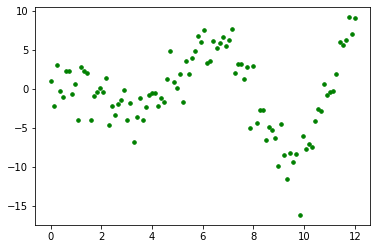

In [2]:
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.');

## Train-test split

The next step is to split the data into training and test sets. Set the `random_state` to 42 and assign 75% of the data in the training set. 

In [5]:
# Split data into 75-25 train-test split 
from sklearn.model_selection import train_test_split
y = df['y']
X = df.drop(columns='y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Build polynomial models

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data. For each of second, third and fourth degrees: 

- Instantiate `PolynomialFeatures()` with the number of degrees 
- Fit and transform the `X_train` features 
- Instantiate and fit a linear regression model on the training data 
- Transform the test data into polynomial features 
- Use the model you built above to make predictions using the transformed test data 
- Evaluate model performance on the test data using `r2_score()` 
- In order to plot how well the model performs on the full dataset, transform `X` using `poly` 
- Use the same model (`reg_poly`) to make predictions using `X_poly` 


degree 2 -0.14450360246115057
degree 3 0.019316598557313824
degree 4 0.5138362771622401


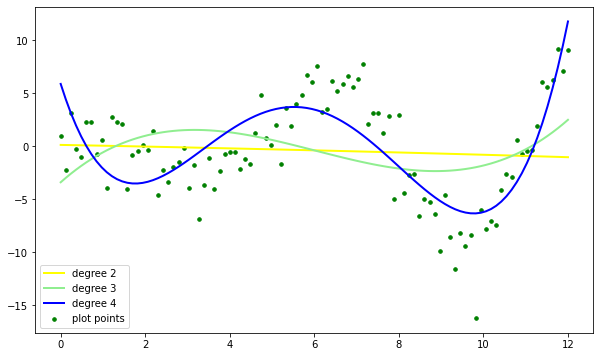

In [8]:
# Import relevant modules and functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='green', s=50, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.fit_transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.fit_transform(X, y)
    
    # Now, we want to see what the model predicts for the entire data 
    y_poly = LinearRegression().fit(X_poly, y).predict(X_poly)
    
    # Create plot of predicted values
    plt.plot(X, y_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

## Summary

Great job! You now know how to include polynomials in your linear models. 

In [12]:
import statsmodels.api as sm
model = sm.OLS(y, X_poly).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.24e-17
Time:                        15:49:08   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.000       2.853       8.864
x1           -12.6406      1.767     -7.155      0.000     -16.148      -9.133
x2             5.3802      0.603      8.921      0.000       4.183       6.577
x3            -0.7563      0.076     -9.992      0.000      -0.907      -0.606
x4             0.0333      0.003     10.632      0.000       0.027       0.039
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.177
Skew:                          -0.257   Prob(JB):                        0.555
Kurtosis:                       2.861   Cond. No.                     5.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X_poly4 = pd.DataFrame(X_poly).drop([1,2,3], axis =1)
model = sm.OLS(y, X_poly4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.005700
Date:                Thu, 24 Dec 2020   Prob (F-statistic):              0.940
Time:                        15:51:36   Log-Likelihood:                -299.88
No. Observations:                 100   AIC:                             603.8
Df Residuals:                      98   BIC:                             609.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.3949      0.612     -0.645      0.520      -1.610       0.820
4           -6.57e-06    8.7e-05     -0.076      0.940      -0.000       0.000
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.006
Skew:                          -0.344   Prob(JB):                        0.367
Kurtosis:                       3.094   Cond. No.                     8.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""